In [1]:
import keras_preprocessing
import tensorflow as tf
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil

TRAINING_DIR = r'C:\Users\Samyuktha Varma\Downloads\FIRE-SMOKE-DATASET\Train'

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      zoom_range = 0.15,
                                      horizontal_flip = True,
                                      fill_mode = 'nearest')

VALIDATION_DIR = r'C:\Users\Samyuktha Varma\Downloads\FIRE-SMOKE-DATASET\Test'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (224, 224),
    shuffle = True,
    class_mode = 'categorical',
    batch_size = 128
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (224, 224),
    shuffle = True,
    class_mode = 'categorical',
    batch_size = 14
)

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [2]:
import tensorflow.keras.backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    return true_positives / (predicted_positives + K.epsilon())

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    actual_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (actual_positives + K.epsilon())

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * ((prec * rec) / (prec + rec + K.epsilon()))


Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 28,101,411 (107.20 MB)

 Trainable params: 6,298,627 (24.03 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

None


C:\Users\Samyuktha Varma\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


C:\Users\Samyuktha Varma\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - acc: 0.5178 - f1_score: 0.5366 - loss: 3.2443 - precision: 0.5366 - recall: 0.5366
Epoch 1
Training loss: 1.592819333076477
Validation loss: 0.5800521969795227
Training accuracy: 0.5538277626037598
Validation accuracy: 0.7295918464660645
Precision: 0.55859375
Recall: 0.55859375
F1-Score: 0.5585936903953552

Best Metrics:
Best Training Loss: 1.592819333076477
Best Training Accuracy: 0.5538277626037598
Best Validation Loss: 0.5800521969795227
Best Validation Accuracy: 0.7295918464660645
Best Precision: 0.55859375
Best Recall: 0.55859375
Best F1-Score: 0.5585936903953552
14/14 ━━━━━━━━━━━━━━━━━━━━ 105s 7s/step - acc: 0.5202 - f1_score: 0.5380 - loss: 3.1342 - precision: 0.5380 - recall: 0.5380 - val_acc: 0.7296 - val_f1_score: 0.7296 - val_loss: 0.5801 - val_precision: 0.7296 - val_recall: 0.7296
Epoch 2/20
 1/14 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - acc: 0.8438 - f1_score: 0.8437 - loss: 0.5342 - precision: 0.8438 - recall: 0.8438

C:\Users\Samyuktha Varma\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2
Training loss: 0.5341618657112122
Validation loss: 0.5665541887283325
Training accuracy: 0.84375
Validation accuracy: 0.7448979616165161
Precision: 0.84375
Recall: 0.84375
F1-Score: 0.8437499403953552

Best Metrics:
Best Training Loss: 0.5341618657112122
Best Training Accuracy: 0.84375
Best Validation Loss: 0.5665541887283325
Best Validation Accuracy: 0.7448979616165161
Best Precision: 0.84375
Best Recall: 0.84375
Best F1-Score: 0.8437499403953552
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 366ms/step - acc: 0.8438 - f1_score: 0.8437 - loss: 0.5342 - precision: 0.8438 - recall: 0.8438 - val_acc: 0.7449 - val_f1_score: 0.7449 - val_loss: 0.5666 - val_precision: 0.7449 - val_recall: 0.7449
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.7870 - f1_score: 0.7849 - loss: 0.4817 - precision: 0.7849 - recall: 0.7849
Epoch 3
Training loss: 0.432547390460968
Validation loss: 0.2992965579032898
Training accuracy: 0.8385167717933655
Validation accuracy: 0.8877550959587097
Precision: 0.832589

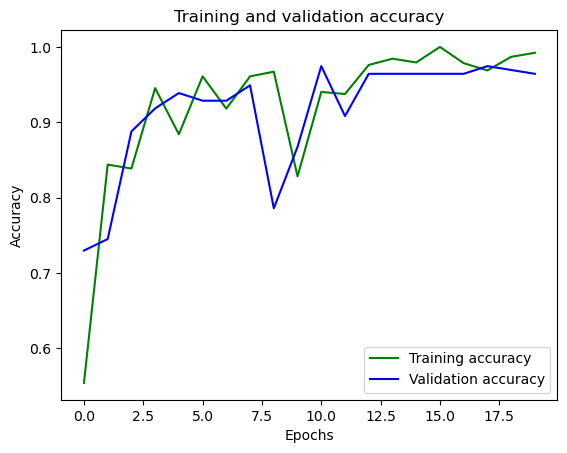

<Figure size 640x480 with 0 Axes>

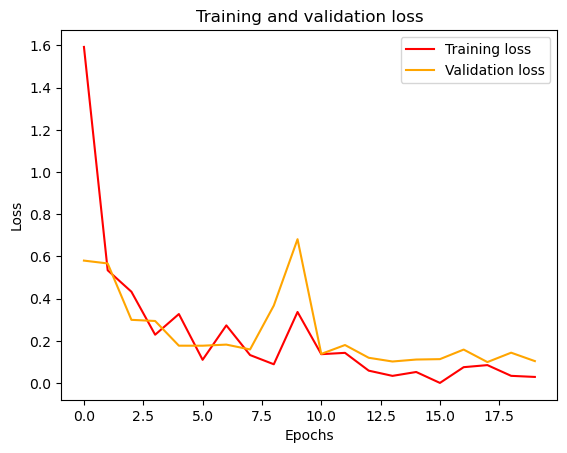

<Figure size 640x480 with 0 Axes>

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil

TRAINING_DIR = r'C:\Users\Samyuktha Varma\Downloads\FIRE-SMOKE-DATASET\Train'

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      zoom_range = 0.15,
                                      horizontal_flip = True,
                                      fill_mode = 'nearest')

VALIDATION_DIR = r'C:\Users\Samyuktha Varma\Downloads\FIRE-SMOKE-DATASET\Test'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (224, 224),
    shuffle = True,
    class_mode = 'categorical',
    batch_size = 128
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (224, 224),
    shuffle = True,
    class_mode = 'categorical',
    batch_size = 14
)

# Define the attention mechanism
def spatial_attention(input_tensor):
    attention = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(input_tensor)
    return tf.keras.layers.multiply([input_tensor, attention])

# Build the base model
input_tensor = Input(shape=(224, 224, 3))
base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

# Apply spatial attention to the output of the base model
x = base_model.output
x = spatial_attention(x)

# Additional layers for classification
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc', precision, recall, f1_score])
print(model.summary())

class myCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.best_metrics = {
            'loss': float('inf'),
            'acc': 0.0,
            'val_loss': float('inf'),
            'val_acc': 0.0,
            'precision': 0.0,
            'recall': 0.0,
            'f1_score': 0.0,

        }
    
    def on_epoch_end(self, epoch, logs={}):
        print('\nEpoch', epoch+1)
        print('Training loss:', logs['loss'])
        print('Validation loss:', logs['val_loss'])
        print('Training accuracy:', logs['acc'])
        print('Validation accuracy:', logs['val_acc'])
        print('Precision:', logs['precision'])
        print('Recall:', logs['recall'])
        print('F1-Score:', logs['f1_score'])
        
        # Update best metrics if a new best value is achieved
        if logs['loss'] < self.best_metrics['loss']:
            self.best_metrics['loss'] = logs['loss']
        if logs['acc'] > self.best_metrics['acc']:
            self.best_metrics['acc'] = logs['acc']
        if logs['val_loss'] < self.best_metrics['val_loss']:
            self.best_metrics['val_loss'] = logs['val_loss']
        if logs['val_acc'] > self.best_metrics['val_acc']:
            self.best_metrics['val_acc'] = logs['val_acc']
        if logs['precision'] > self.best_metrics['precision']:
            self.best_metrics['precision'] = logs['precision']
        if logs['recall'] > self.best_metrics['recall']:
            self.best_metrics['recall'] = logs['recall']
        if logs['f1_score'] > self.best_metrics['f1_score']:
            self.best_metrics['f1_score'] = logs['f1_score']
            
        print('\nBest Metrics:')
        print('Best Training Loss:', self.best_metrics['loss'])
        print('Best Training Accuracy:', self.best_metrics['acc'])
        print('Best Validation Loss:', self.best_metrics['val_loss'])
        print('Best Validation Accuracy:', self.best_metrics['val_acc'])
        print('Best Precision:', self.best_metrics['precision'])
        print('Best Recall:', self.best_metrics['recall'])
        print('Best F1-Score:', self.best_metrics['f1_score'])
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend (loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend (loc=0)
plt.figure()
plt.show()

C:\Users\Samyuktha Varma\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


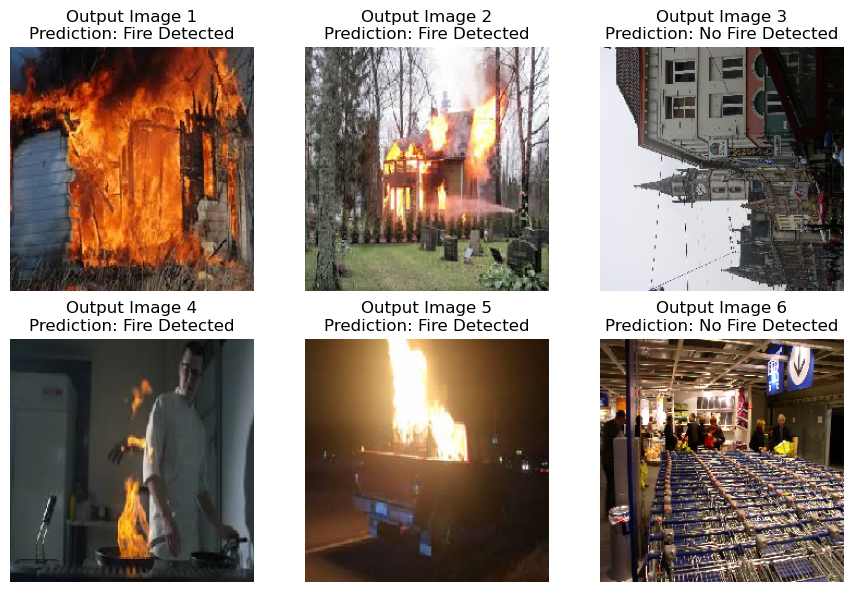

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array

# Load images from the "output" folder
output_folder = r'C:\Users\Samyuktha Varma\Downloads\FIRE-SMOKE-DATASET\output'  # Path to your "output" folder

# Get a list of image filenames in the folder
image_files = [file for file in os.listdir(output_folder) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

num_images = len(image_files)
num_rows = 2  # Number of rows in the grid
num_cols = 3  # Number of columns in the grid
grid_size = num_rows * num_cols

# Ensure that you have at least as many images as grid cells
if num_images < grid_size:
    raise ValueError("Not enough images in the 'output' folder to fill the grid.")

# Create a new figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(9, 6))

for i in range(grid_size):
    img_path = os.path.join(output_folder, image_files[i])
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize image
    ax = axes[i // num_cols, i % num_cols] if grid_size > 1 else axes
    ax.imshow(img_array)
    ax.axis('off')
    
    # Make predictions using the loaded model
    x = np.expand_dims(img_array, axis=0)
    predictions = model.predict(x)
    prediction_label = np.argmax(predictions[0])

    if prediction_label == 0:
        prediction_label = "Fire Detected"
    else:
        prediction_label = "No Fire Detected"
    
    ax.set_title(f'Output Image {i+1}\nPrediction: {prediction_label}')  # Set caption with prediction

# Show the grid of images with captions
plt.tight_layout()
plt.show()

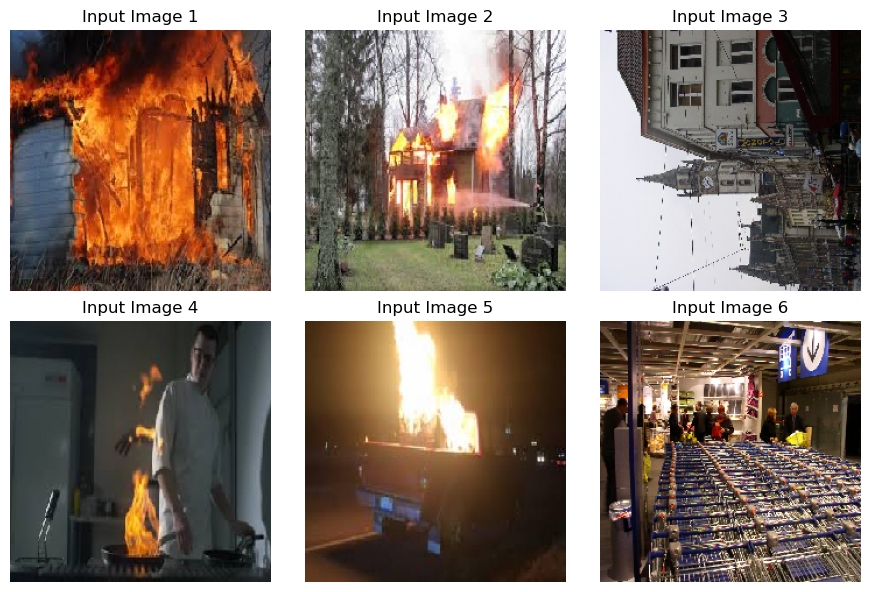

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array

# Load images from the "Input" folder
input_folder = r'C:\Users\Samyuktha Varma\Downloads\FIRE-SMOKE-DATASET\Input'  # Path to your "Input" folder

# Get a list of image filenames in the folder
image_files = [file for file in os.listdir(input_folder) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

num_images = len(image_files)
num_rows = 2  # Number of rows in the grid
num_cols = 3  # Number of columns in the grid
grid_size = num_rows * num_cols

# Ensure that you have at least as many images as grid cells
if num_images < grid_size:
    raise ValueError("Not enough images in the 'Input' folder to fill the grid.")

# Create a new figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(9, 6))

for i in range(grid_size):
    img_path = os.path.join(input_folder, image_files[i])
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize image
    ax = axes[i // num_cols, i % num_cols] if grid_size > 1 else axes
    ax.imshow(img_array)
    ax.axis('off')
    ax.set_title(f'Input Image {i+1}')  # Set caption for the image

# Show the grid of images with captions
plt.tight_layout()
plt.show()